# 1.4.10.Histograms in opencv

In [3]:
import cv2
import numpy as np

[[1.7100e+02 2.3000e+02 1.2600e+02 1.2100e+02 9.7000e+01 1.2800e+02
  1.0300e+02 1.1700e+02 8.6000e+01 1.0200e+02 1.1100e+02 9.8000e+01
  1.0800e+02 1.1300e+02 1.2100e+02 1.2200e+02 1.3300e+02 1.5900e+02
  2.1800e+02 1.7700e+02 1.2900e+02 1.3900e+02 1.3100e+02 2.1100e+02
  2.1700e+02 2.4300e+02 5.4200e+02 3.2800e+02 1.9400e+02 2.0600e+02
  2.0100e+02 1.5790e+03 3.0900e+02 6.1200e+02 7.9500e+02 7.0100e+02
  2.7850e+03 1.5220e+03 9.7520e+03 1.2511e+04 1.0151e+04 1.0321e+04
  1.6618e+04 1.9232e+04 2.1733e+04 1.5512e+04 1.9892e+04 3.1655e+04
  2.7197e+04 1.8398e+04 1.8275e+04 2.4830e+04 1.9152e+04 1.6164e+04
  2.5928e+04 2.3345e+04 1.2652e+04 1.1435e+04 1.5054e+04 1.3869e+04
  1.5599e+04 1.8731e+04 1.5077e+04 1.6052e+04 2.0009e+04 1.7768e+04
  1.8575e+04 1.4709e+04 1.6658e+04 1.7366e+04 1.9652e+04 2.1989e+04
  1.6230e+04 1.7072e+04 1.7202e+04 2.3537e+04 2.0536e+04 2.8622e+04
  3.0627e+04 2.3974e+04 3.5192e+04 3.9287e+04 3.1611e+04 2.5912e+04
  3.6719e+04 2.4577e+04 2.1987e+04 2.6659e+04 2.

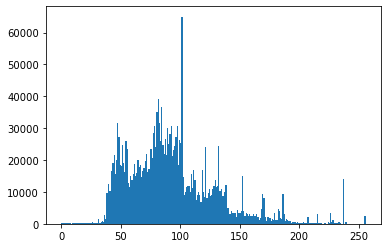

In [4]:
img = cv2.imread('messigray.png',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
print(np.transpose(hist))
hist = np.bincount(img.ravel(),minlength=256)
from matplotlib import pyplot as plt
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [5]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\histogram.cpp:160: error: (-215:Assertion failed) j < nimages in function 'cv::histPrepareImages'


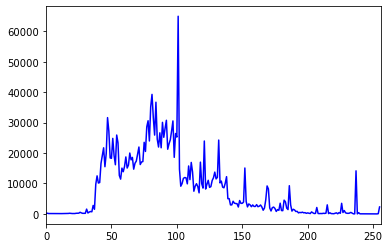

In [6]:
img = cv2.imread('messigray.png',0)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

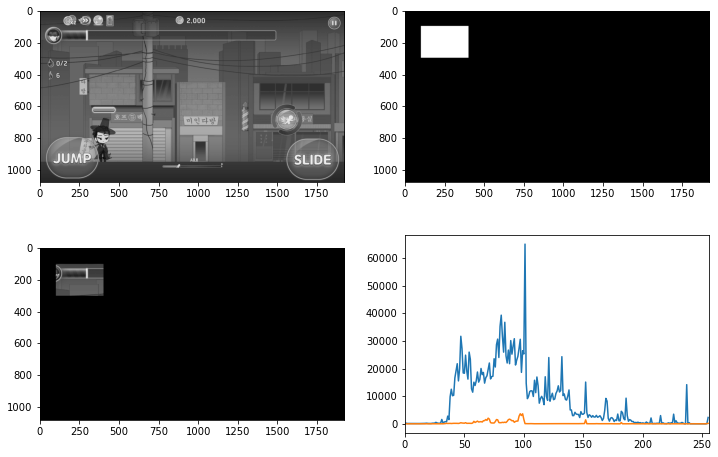

In [7]:
img = cv2.imread('messigray.png',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

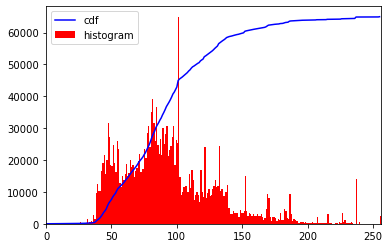

In [8]:


hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]


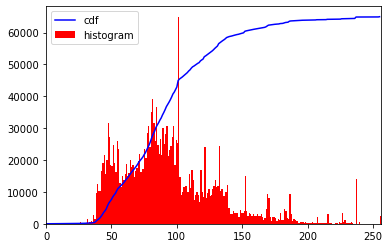

In [9]:
img = cv2.imread('messigray.png',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [10]:
cv2.imshow('img',img)
cv2.imshow('img2',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()